In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Set the style for the plots
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the data
marjanta_data = pd.read_csv('MARJANTA_DATA_CW3 (S) (2) (1).csv', encoding = 'latin')
marjanta_data.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [5]:
marjanta_data.columns

Index(['Ref', 'id', 'Gender', 'Satisfied', 'Age', 'Age Band', 'Type of Travel',
       'Class', 'Flight Distance', 'Destination', 'Continent',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [6]:
# Check the basic info of the dataset
print(marjanta_data.info())

# Check for missing values
missing_values = marjanta_data.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

In [11]:
# Fill missing values in 'Arrival Delay in Minutes' with the median
marjanta_data['Arrival Delay in Minutes'].fillna(marjanta_data['Arrival Delay in Minutes'].median(), inplace=True)

# Check if missing values are handled
marjanta_data.isnull().sum()

,0
Ref,0
id,0
Gender,0
Satisfied,0
Age,0
Age Band,0
Type of Travel,0
Class,0
Flight Distance,0
Destination,0


In [12]:
# Check for duplicates
duplicate_rows = marjanta_data[marjanta_data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


In [14]:
# Check for data types and convert if necessary
print(marjanta_data.dtypes)

Ref                                    int64
id                                     int64
Gender                                object
Satisfied                             object
Age                                    int64
Age Band                              object
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Destination                           object
Continent                             object
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin se

In [15]:
# Loop through all columns with object dtype
for column in marjanta_data.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}':\n")
    print(marjanta_data[column].value_counts(), "\n")
    print("-" * 50)

Unique values in 'Gender':

Gender
Female    52727
Male      51177
Name: count, dtype: int64 

--------------------------------------------------
Unique values in 'Satisfied':

Satisfied
Y    84920
N    18984
Name: count, dtype: int64 

--------------------------------------------------
Unique values in 'Age Band':

Age Band
35 to 44      24132
45 to 54      21422
25 to 34      19723
55 to 64      14064
18 to 24      11884
Under 18       7931
65 or over     4748
Name: count, dtype: int64 

--------------------------------------------------
Unique values in 'Type of Travel':

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64 

--------------------------------------------------
Unique values in 'Class':

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64 

--------------------------------------------------
Unique values in 'Destination':

Destination
India                  83932
Italy                    943
Repub

In [17]:
# Dropping the unnecessary columns
marjanta_data_cleaned = marjanta_data.drop(columns=['Destination', 'id', 'Ref'])

# Display the first few rows to confirm the columns have been dropped
marjanta_data_cleaned.head()

,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Continent,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,Asia,3,4,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,N,25,25 to 34,Business travel,Business,235,Europe,0,2,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Y,26,25 to 34,Business travel,Business,4760,Asia,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Y,25,25 to 34,Business travel,Business,560,Europe,2,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Y,61,55 to 64,Business travel,Business,4760,Asia,3,3,...,5,3,3,4,4,3,3,3,0,0.0


Satisfied
Y    84920
N    18984
Name: count, dtype: int64


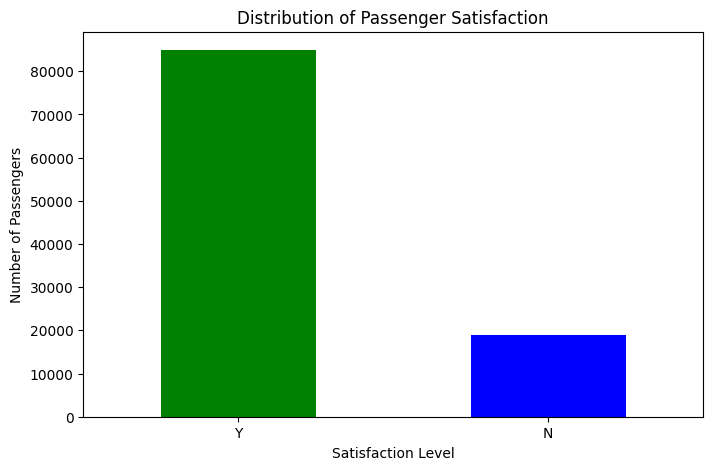

In [21]:
# Identify the target variable
target_variable = 'Satisfied'

# Print the value counts for the target variable
satisfaction_counts = marjanta_data_cleaned[target_variable].value_counts()
print(satisfaction_counts)

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 5))
satisfaction_counts.plot(kind='bar', color=['green', 'blue'])
plt.title('Distribution of Passenger Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.show()

In [22]:
# Calculate basic descriptive statistics for numerical columns
numerical_desc = marjanta_data_cleaned.describe().T[['mean', '50%', 'std']]
numerical_desc.rename(columns={'50%': 'median'}, inplace=True)  # Renaming for clarity

# Calculate mode for numerical columns
numerical_mode = marjanta_data_cleaned.mode().iloc[0]

# Combine the descriptive statistics with mode
numerical_stats = numerical_desc.assign(mode=numerical_mode)

# Print the descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

Descriptive Statistics for Numerical Columns:
                                          mean  median          std  mode
Age                                  39.379706    40.0    15.114964    39
Flight Distance                    4164.071066  4760.0  1346.755749  4760
Inflight wifi service                 2.522319     3.0     1.447848     3
Departure/Arrival time convenient     3.060248     3.0     1.525143     4
Ease of Online booking                2.756852     3.0     1.398993     3
Gate location                         2.976825     3.0     1.277703     3
Food and drink                        3.202023     3.0     1.329625     4
Online boarding                       3.250250     3.0     1.349607     4
Seat comfort                          3.398666     4.0     1.365819     4
Inflight entertainment                3.358071     4.0     1.333104     4
On-board service                      3.382247     4.0     1.288478     4
Leg room service                      3.350930     4.0     1.31571

In [27]:
# Initialize an empty list to hold the summary statistics for categorical variables
summary_stats = []

# Loop through each categorical column to calculate summary statistics
for col in marjanta_data_cleaned.select_dtypes(include=['object']).columns:
    unique_count = marjanta_data_cleaned[col].nunique()  # Count of unique values
    top_value = marjanta_data_cleaned[col].mode()[0]  # Most common value
    top_count = marjanta_data_cleaned[col].value_counts().iloc[0]  # Frequency of the most common value
    summary_stats.append({
        'Variable': col,
        'Unique Count': unique_count,
        'Most Common Value': top_value,
        'Most Common Count': top_count
    })

# Convert the summary statistics list to a DataFrame
categorical_summary_df = pd.DataFrame(summary_stats)

# Print the resulting DataFrame
print("Categorical Variables Summary Statistics:")
print(categorical_summary_df)

Categorical Variables Summary Statistics:
         Variable  Unique Count Most Common Value  Most Common Count
0          Gender             2            Female              52727
1       Satisfied             2                 Y              84920
2        Age Band             7          35 to 44              24132
3  Type of Travel             2   Business travel              71655
4           Class             3          Business              49665
5       Continent             6              Asia              85789


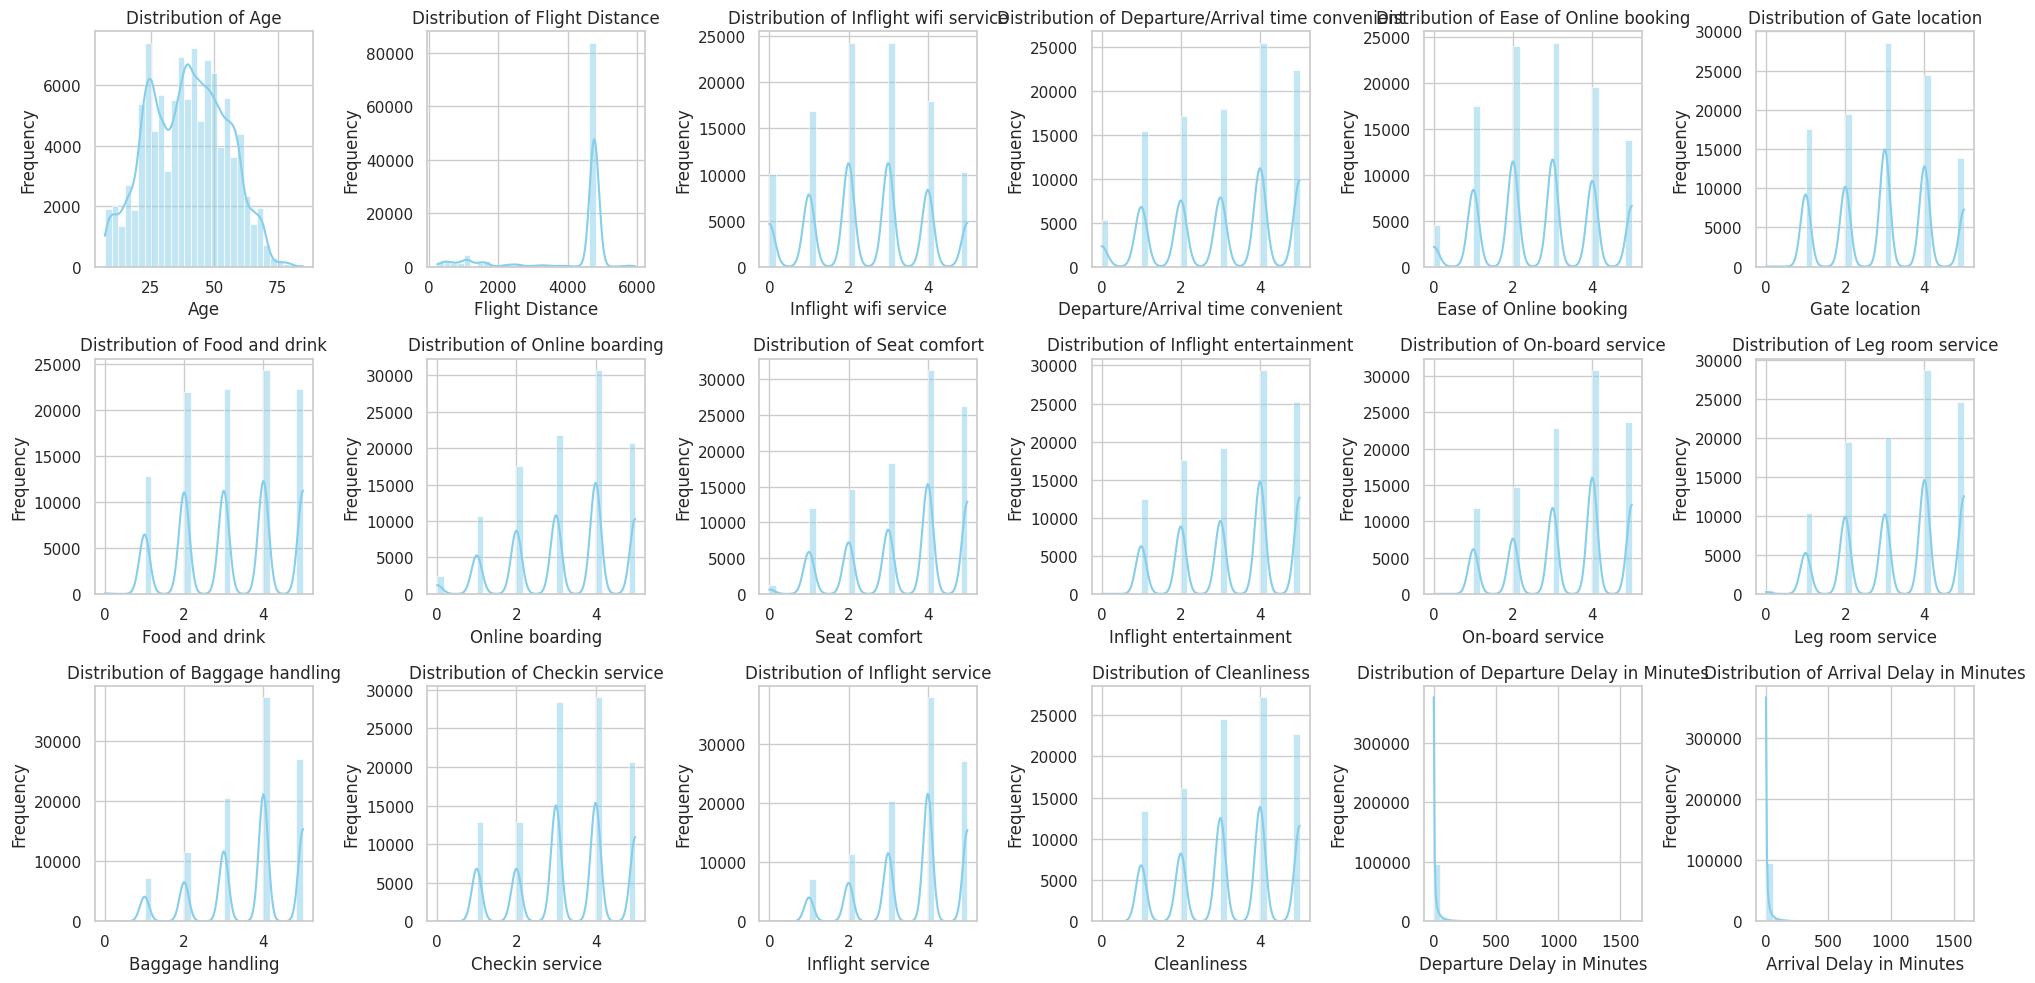

In [34]:
# Numerical Features Histogram
numerical_features = marjanta_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 10))

# Create histograms for all numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 6, i)  # Adjust the number of rows and columns based on your dataset
    sns.histplot(marjanta_data_cleaned[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

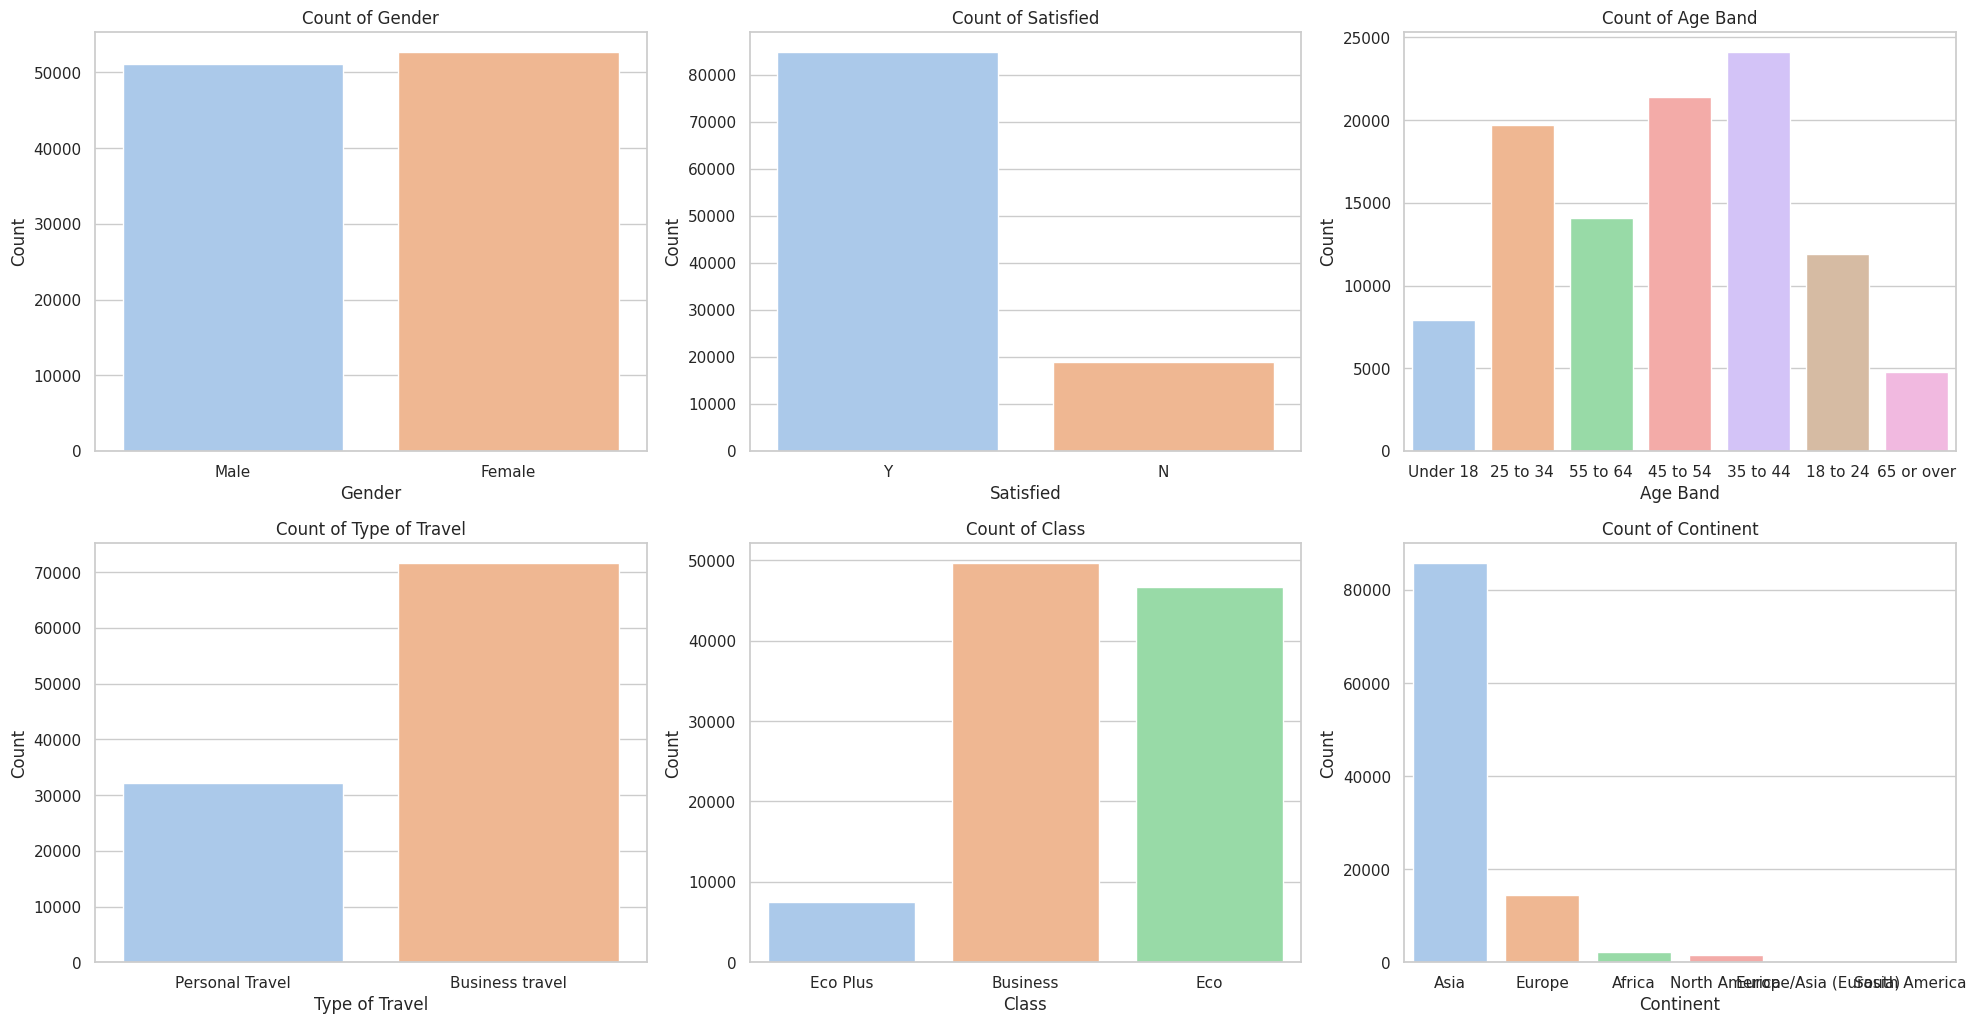

In [35]:
# Categorical Features Bar Charts
categorical_features = marjanta_data_cleaned.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))

# Create bar charts for all categorical features
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns based on your dataset
    sns.countplot(data=marjanta_data_cleaned, x=feature, palette='pastel')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

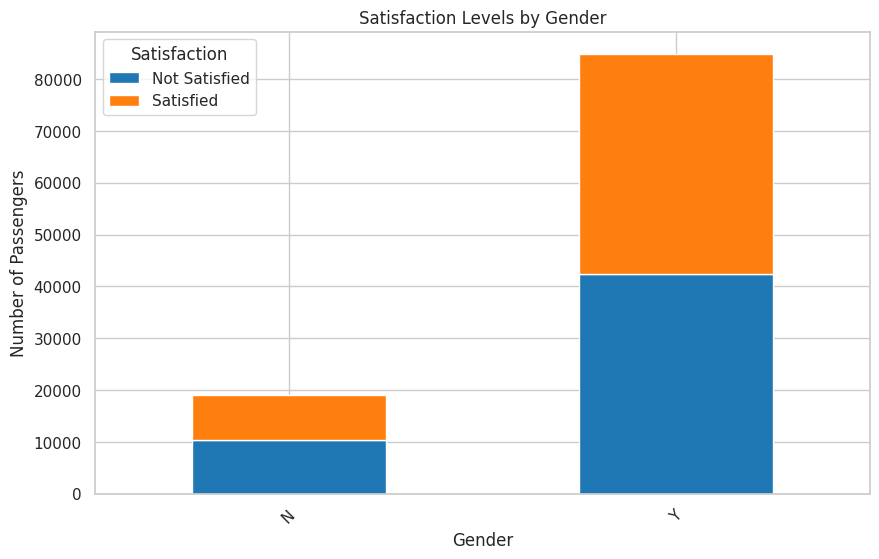

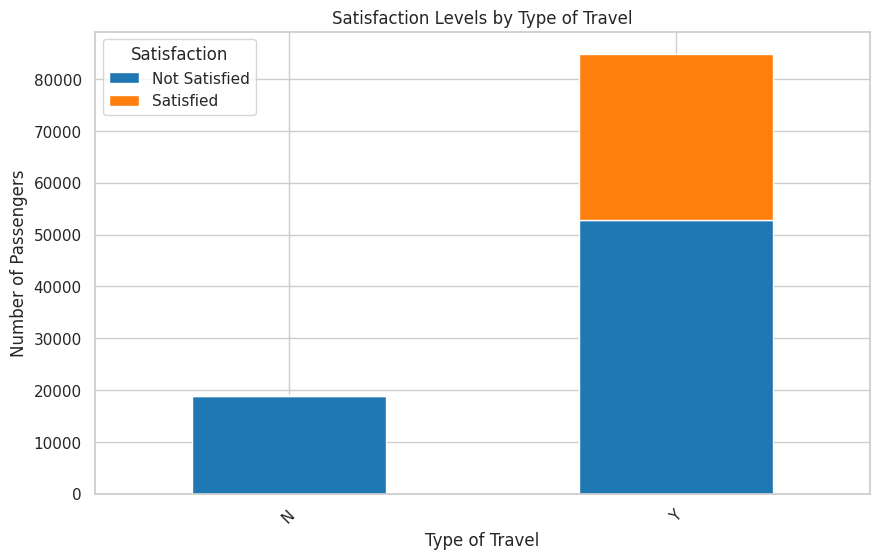

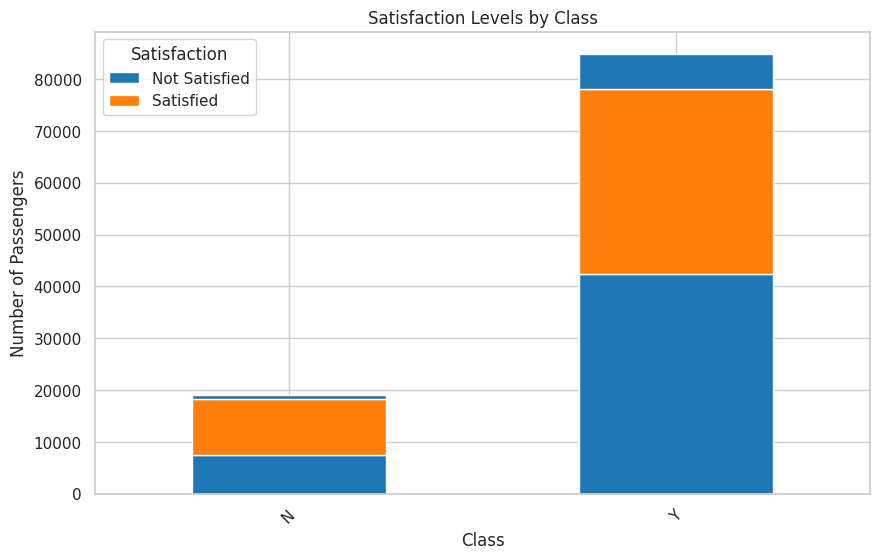

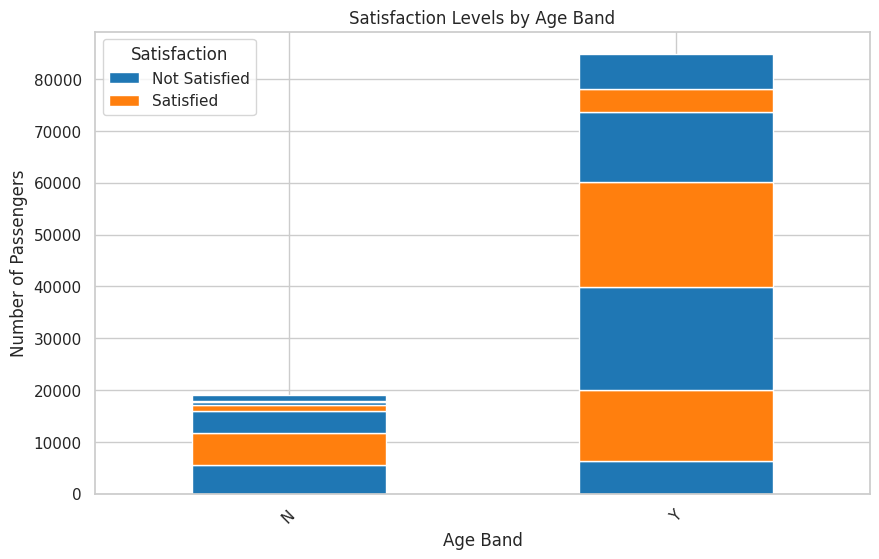

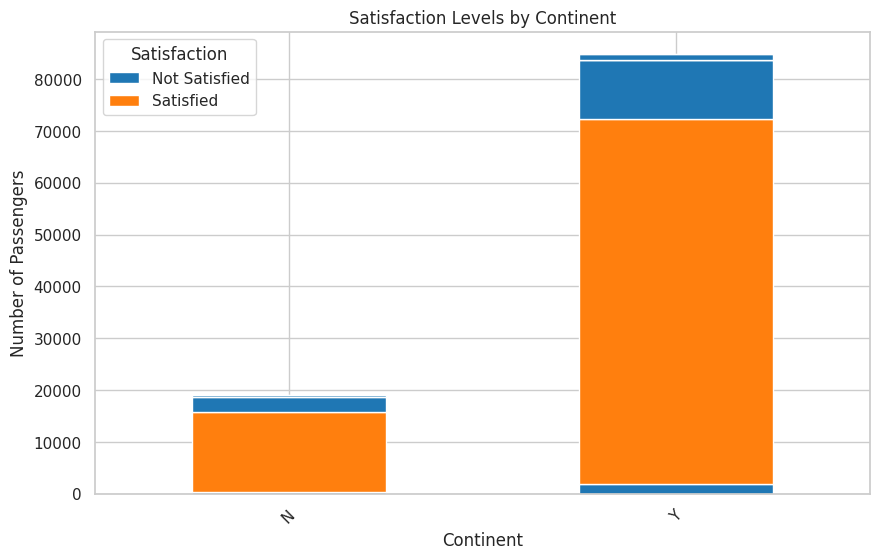

In [36]:
# Function to create stacked bar charts for categorical variables against satisfaction
def stacked_bar_chart(data, category):
    satisfaction_counts = data.groupby(['Satisfied', category]).size().unstack().fillna(0)
    satisfaction_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))
    plt.title(f'Satisfaction Levels by {category}')
    plt.xlabel(category)
    plt.ylabel('Number of Passengers')
    plt.xticks(rotation=45)
    plt.legend(title='Satisfaction', labels=['Not Satisfied', 'Satisfied'])
    plt.show()

# List of categorical features to analyze
categorical_features = ['Gender', 'Type of Travel', 'Class', 'Age Band', 'Continent']

# Create stacked bar charts for each categorical feature
for feature in categorical_features:
    stacked_bar_chart(marjanta_data_cleaned, feature)

In [40]:
# Function to display satisfaction counts for categorical variables against satisfaction
def display_satisfaction_counts(data, category):
    satisfaction_counts = data.groupby(['Satisfied', category]).size().unstack().fillna(0)
    print(f'\nSatisfaction Counts by {category}:\n')
    print(satisfaction_counts)

# List of categorical features to analyze
categorical_features = ['Gender', 'Type of Travel', 'Class', 'Age Band', 'Continent']

# Print satisfaction counts for each categorical feature
for feature in categorical_features:
    display_satisfaction_counts(marjanta_data_cleaned, feature)


Satisfaction Counts by Gender:

Gender     Female   Male
Satisfied               
N           10270   8714
Y           42457  42463

Satisfaction Counts by Type of Travel:

Type of Travel  Business travel  Personal Travel
Satisfied                                       
N                         18819              165
Y                         52836            32084

Satisfaction Counts by Class:

Class      Business    Eco  Eco Plus
Satisfied                           
N              7358  10911       715
Y             42307  35834      6779

Satisfaction Counts by Age Band:

Age Band   18 to 24  25 to 34  35 to 44  45 to 54  55 to 64  65 or over  \
Satisfied                                                                 
N              5576      6046      4256      1221       551         212   
Y              6308     13677     19876     20201     13513        4536   

Age Band   Under 18  
Satisfied            
N              1122  
Y              6809  

Satisfaction Counts by Co

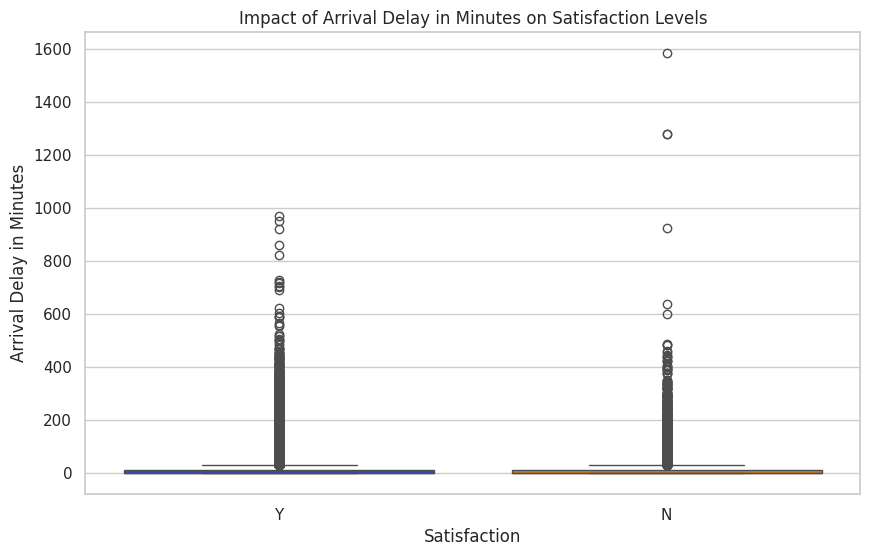

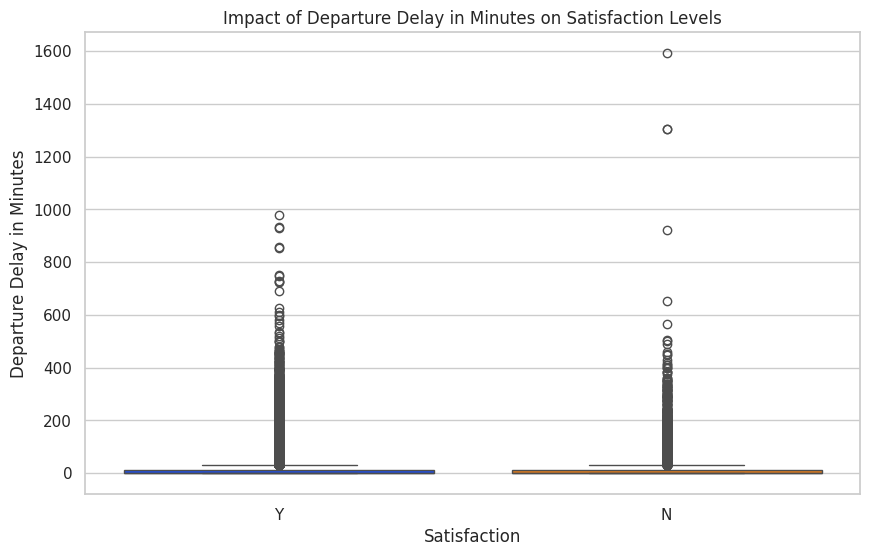

In [42]:
# Function to create box plots for delay impact on satisfaction
def box_plot_delay(data, delay_variable):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Satisfied', y=delay_variable, data=data, palette='bright')
    plt.title(f'Impact of {delay_variable} on Satisfaction Levels')
    plt.xlabel('Satisfaction')
    plt.ylabel(delay_variable)
    plt.show()

# Analyze the impact of both arrival and departure delays
box_plot_delay(marjanta_data_cleaned, 'Arrival Delay in Minutes')
box_plot_delay(marjanta_data_cleaned, 'Departure Delay in Minutes')

In [41]:
# Function to print summary statistics for delay impact on satisfaction
def print_delay_impact(data, delay_variable):
    # Group by satisfaction and calculate mean, median, and standard deviation for the delay variable
    delay_summary = data.groupby('Satisfied')[delay_variable].agg(['mean', 'median', 'std', 'count'])
    print(f"\n{delay_variable} Impact on Satisfaction Levels:")
    print(delay_summary)

# Analyze the impact of both arrival and departure delays
print_delay_impact(marjanta_data_cleaned, 'Arrival Delay in Minutes')
print_delay_impact(marjanta_data_cleaned, 'Departure Delay in Minutes')


Arrival Delay in Minutes Impact on Satisfaction Levels:
                mean  median        std  count
Satisfied                                     
N          15.742836     0.0  42.357218  18984
Y          15.000318     0.0  37.864854  84920

Departure Delay in Minutes Impact on Satisfaction Levels:
                mean  median        std  count
Satisfied                                     
N          15.360936     0.0  41.862633  18984
Y          14.697103     0.0  37.473848  84920


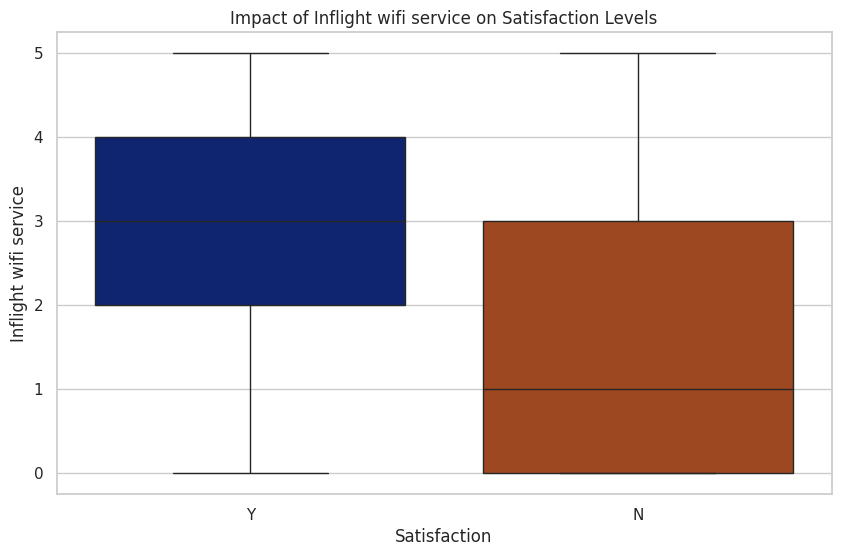

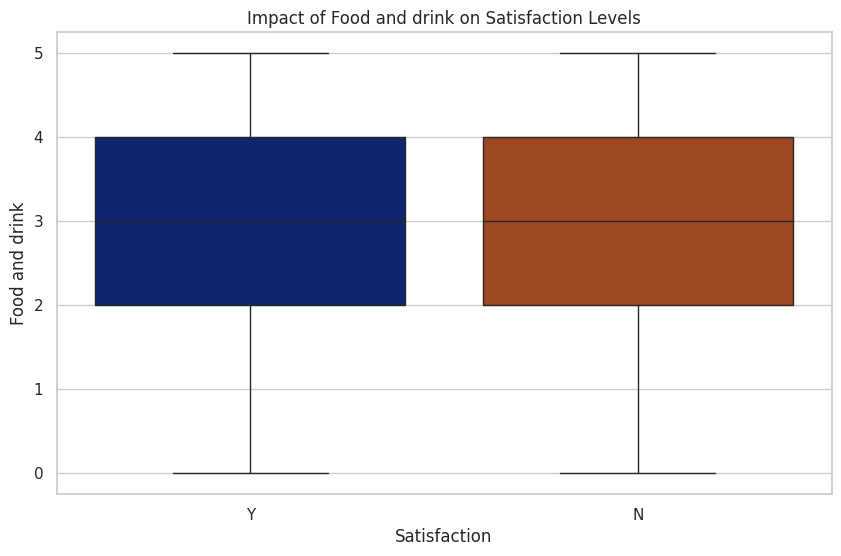

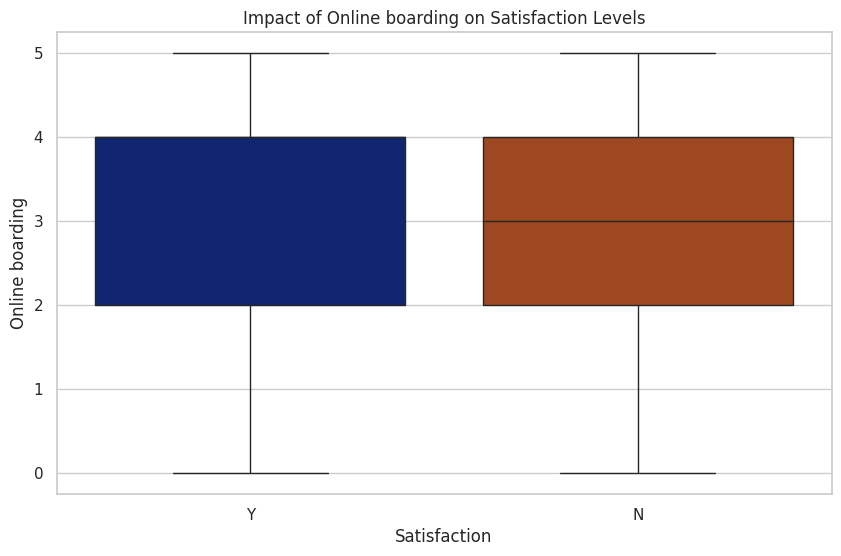

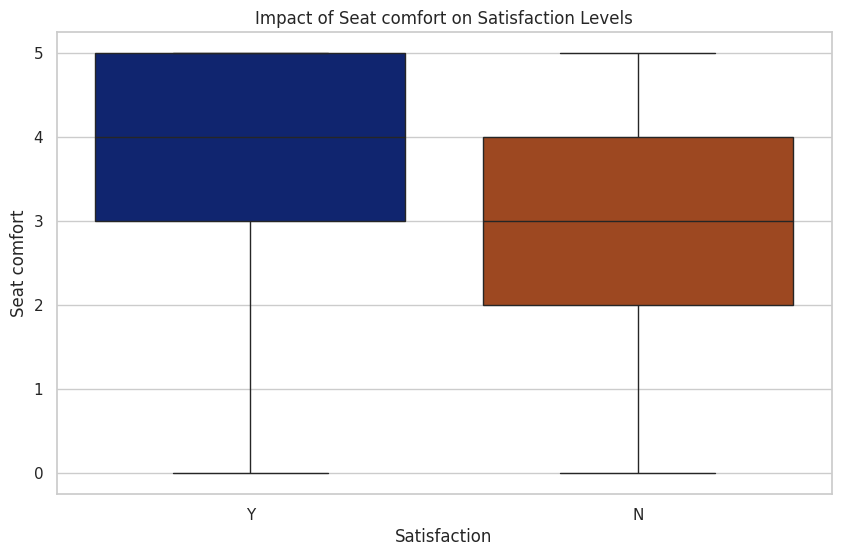

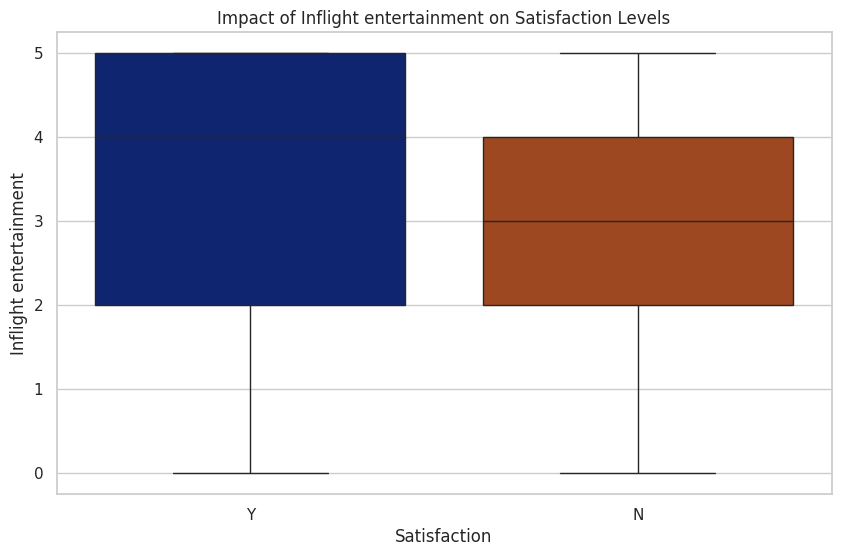

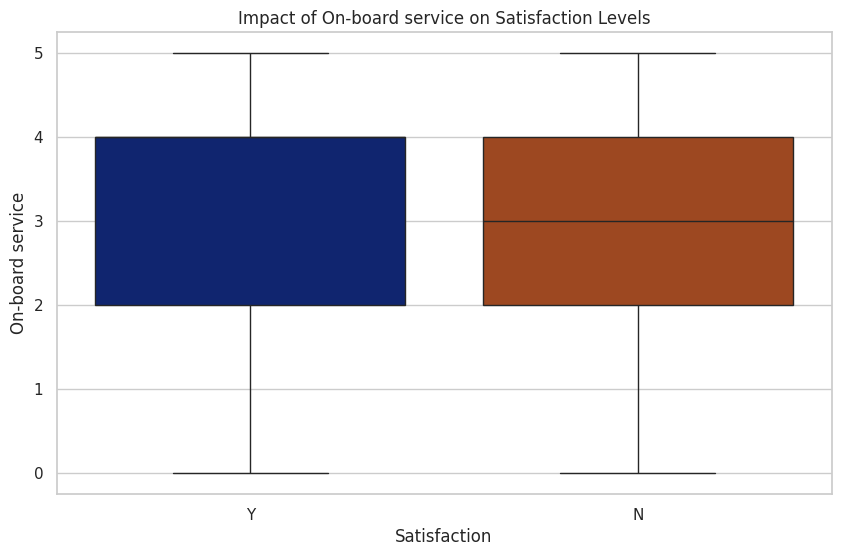

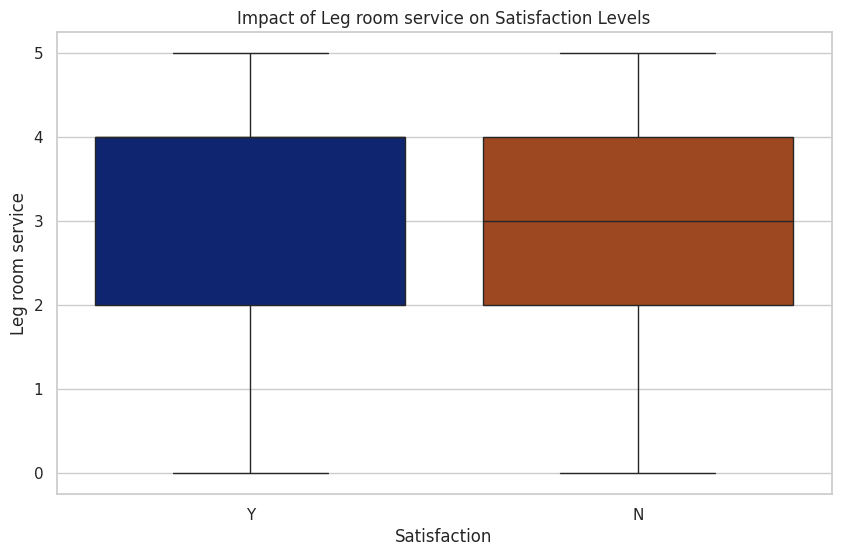

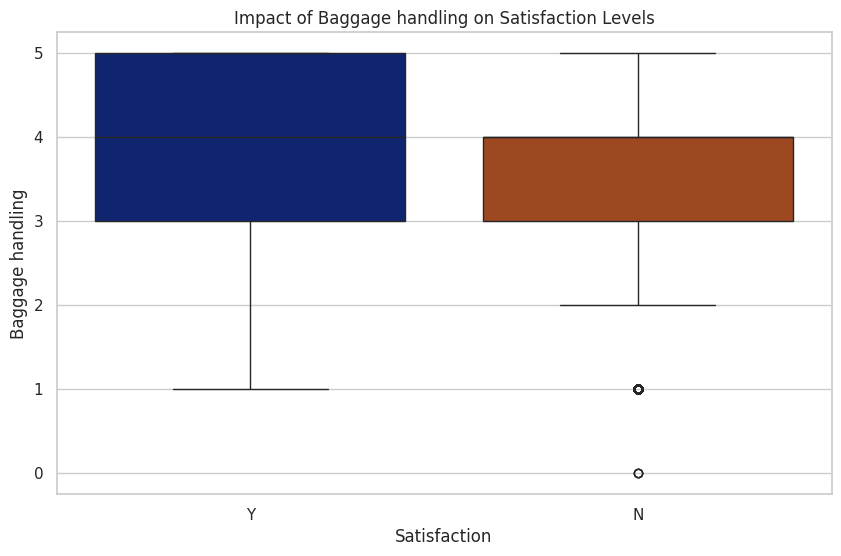

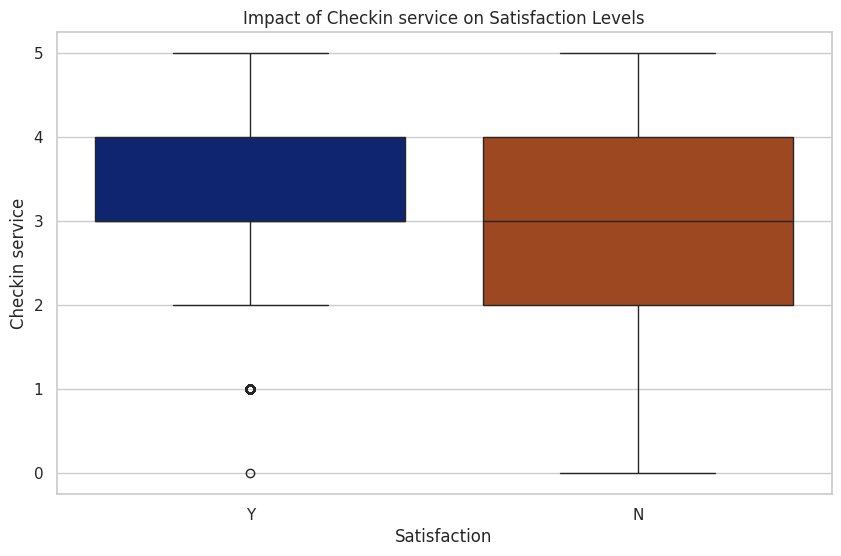

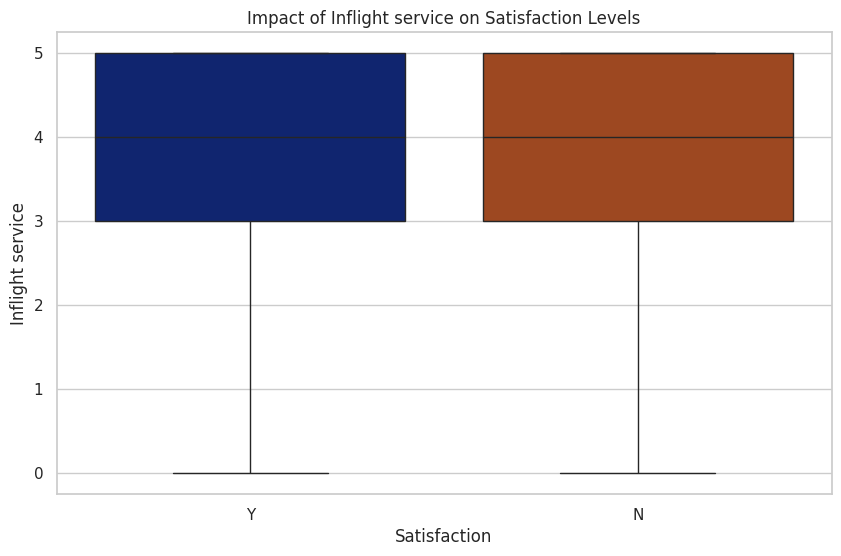

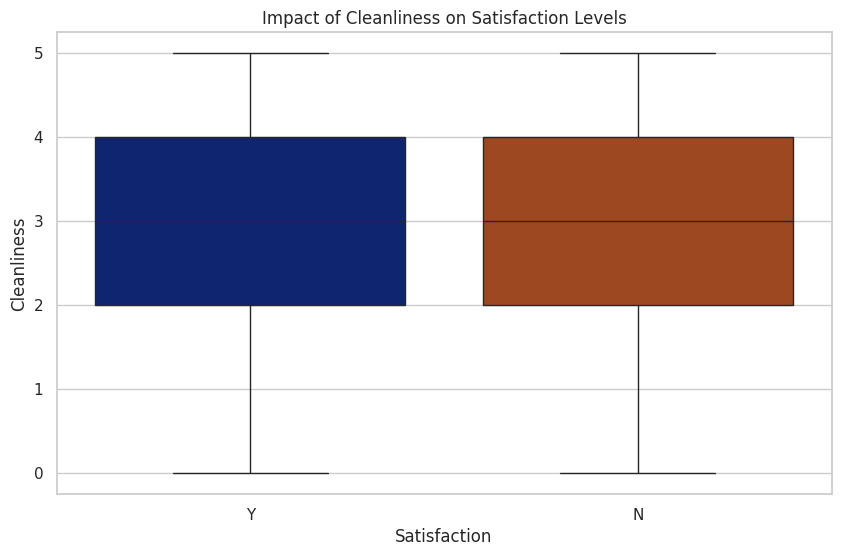

In [44]:
# List of service-related columns to analyze
service_columns = [
    'Inflight wifi service', 'Food and drink', 'Online boarding',
    'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness'
]

# Function to create box plots for each service variable against satisfaction
def box_plot_service(data, service_variable):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Satisfied', y=service_variable, data=data, palette='dark')
    plt.title(f'Impact of {service_variable} on Satisfaction Levels')
    plt.xlabel('Satisfaction')
    plt.ylabel(service_variable)
    plt.show()

# Generate box plots for each service variable
for service in service_columns:
    box_plot_service(marjanta_data_cleaned, service)

In [45]:
# Function to print summary statistics for each service variable against satisfaction
def service_summary_statistics(data, service_variable):
    summary_stats = data.groupby('Satisfied')[service_variable].describe()
    print(f'Summary Statistics for {service_variable}:\n{summary_stats}\n')

# List of service-related columns to analyze
service_columns = [
    'Inflight wifi service', 'Food and drink', 'Online boarding',
    'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness'
]

# Generate summary statistics for each service variable
for service in service_columns:
    service_summary_statistics(marjanta_data_cleaned, service)

Summary Statistics for Inflight wifi service:
             count      mean       std  min  25%  50%  75%  max
Satisfied                                                      
N          18984.0  1.573483  1.557135  0.0  0.0  1.0  3.0  5.0
Y          84920.0  2.734432  1.332900  0.0  2.0  3.0  4.0  5.0

Summary Statistics for Food and drink:
             count      mean       std  min  25%  50%  75%  max
Satisfied                                                      
N          18984.0  3.034450  1.386745  0.0  2.0  3.0  4.0  5.0
Y          84920.0  3.239484  1.313605  0.0  2.0  3.0  4.0  5.0

Summary Statistics for Online boarding:
             count      mean       std  min  25%  50%  75%  max
Satisfied                                                      
N          18984.0  2.709703  1.335418  0.0  2.0  3.0  4.0  5.0
Y          84920.0  3.371090  1.322896  0.0  2.0  4.0  4.0  5.0

Summary Statistics for Seat comfort:
             count      mean       std  min  25%  50%  75%  max
Sat

In [48]:
# Identify categorical variables
categorical_cols = marjanta_data_cleaned.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    marjanta_data_cleaned[col] = label_encoder.fit_transform(marjanta_data_cleaned[col])

# Display the updated DataFrame
marjanta_data_cleaned.head()

,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Continent,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,13,6,1,2,4760,1,3,4,...,5,5,4,3,4,4,5,5,25,18.0
1,1,0,25,1,0,0,235,2,0,2,...,1,1,1,5,3,1,4,1,1,6.0
2,0,1,26,1,0,0,4760,1,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,1,25,1,0,0,560,2,2,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,1,61,4,0,0,4760,1,3,3,...,5,3,3,4,4,3,3,3,0,0.0


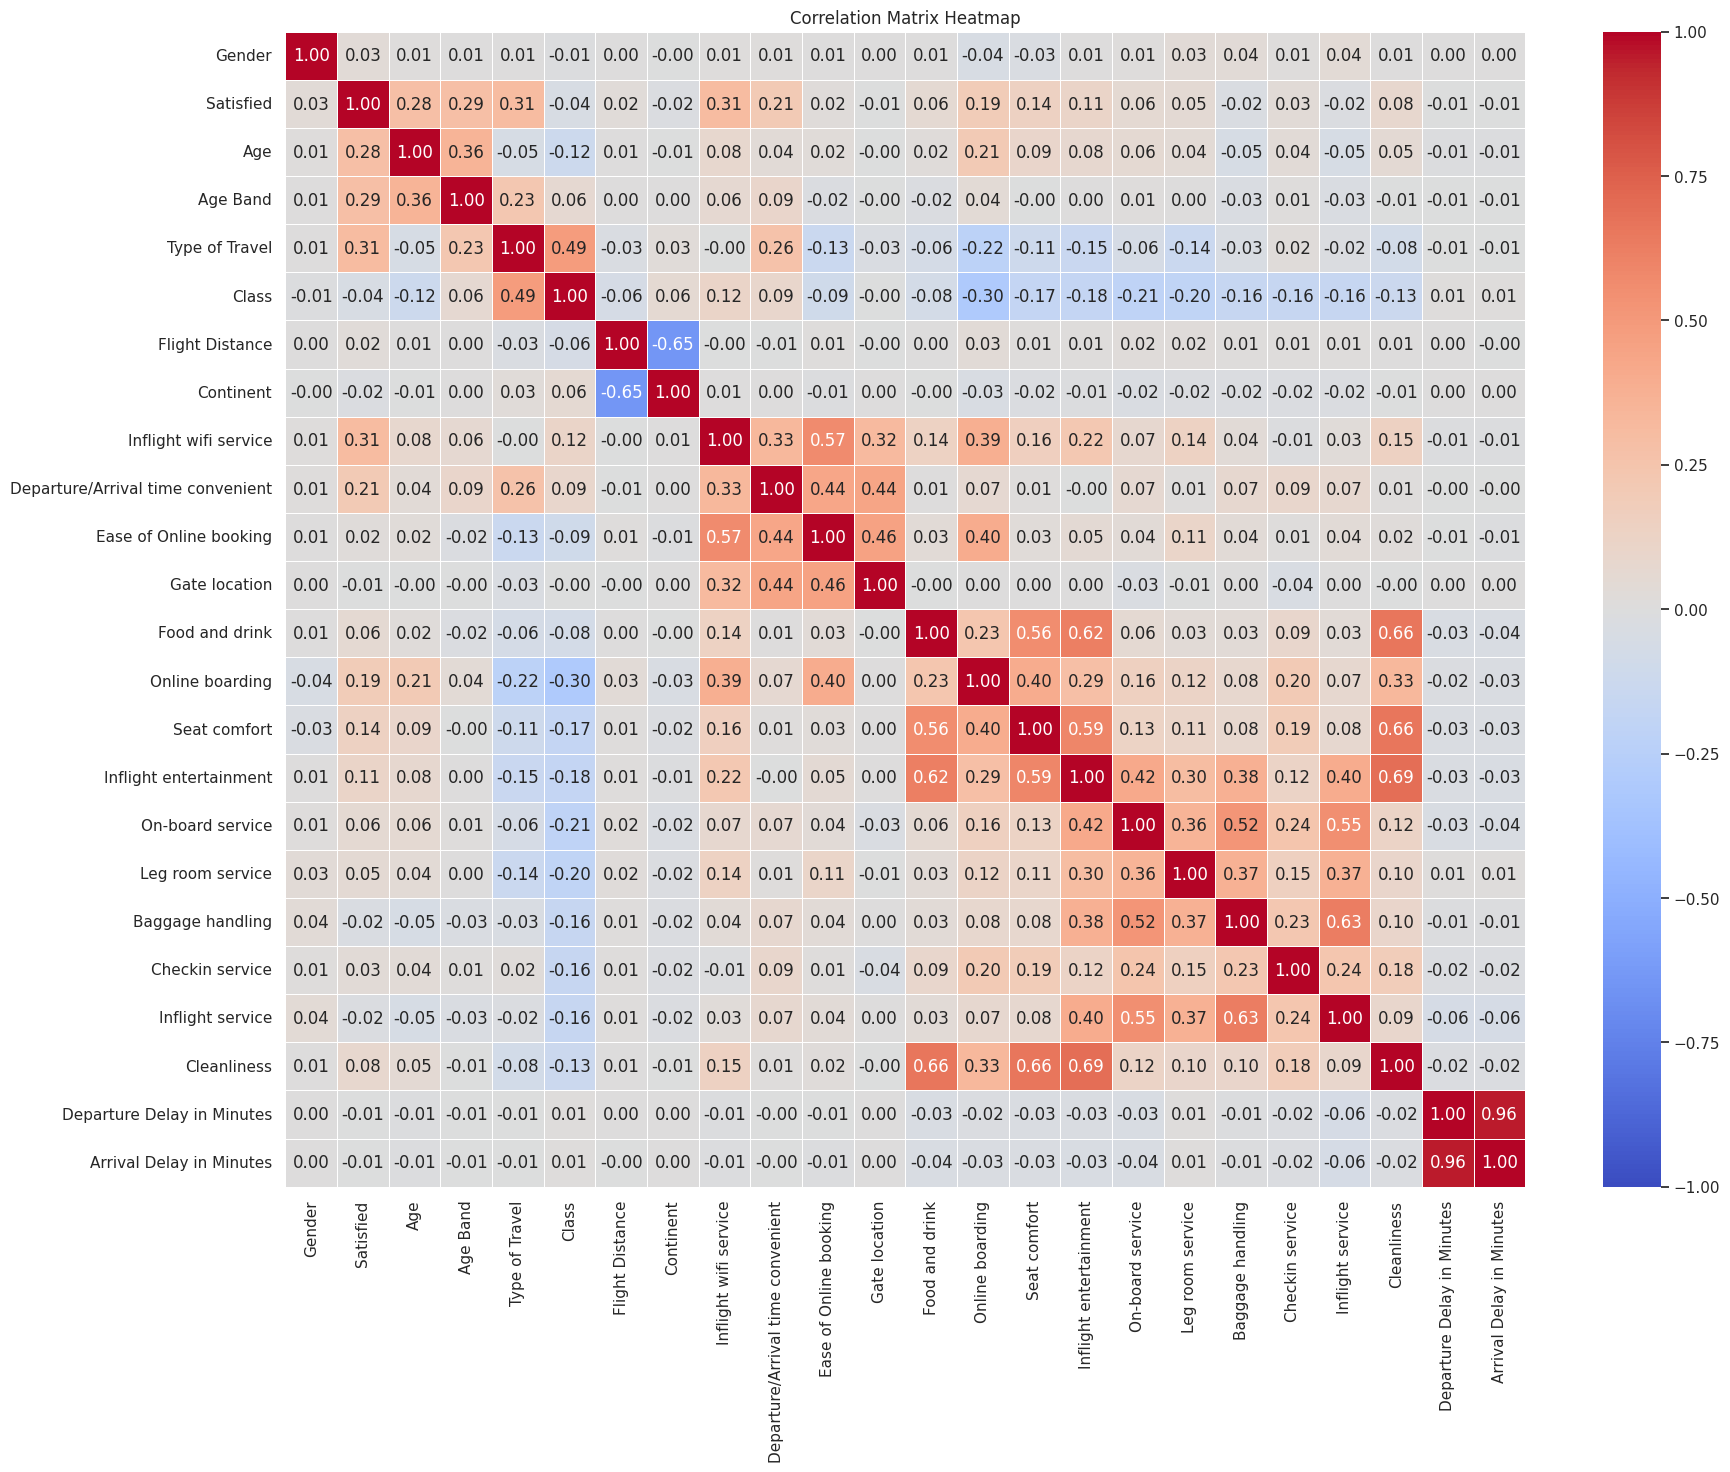

In [51]:
# Step 1: Generate the correlation matrix
correlation_matrix = marjanta_data_cleaned.corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [52]:
# Calculate the correlation matrix
correlation_matrix = marjanta_data_cleaned.corr()

# Get the correlation of all features with 'Satisfied'
satisfaction_corr = correlation_matrix['Satisfied'].sort_values(ascending=False)

# Get the top 10 correlations with satisfaction
top_10_correlations = satisfaction_corr.head(11)  # include 'Satisfied' itself

# Print the results
print("Top 10 Major Correlations with Satisfaction:")
print(top_10_correlations)

Top 10 Major Correlations with Satisfaction:
Satisfied                            1.000000
Inflight wifi service                0.309855
Type of Travel                       0.308311
Age Band                             0.287817
Age                                  0.281640
Departure/Arrival time convenient    0.206982
Online boarding                      0.189373
Seat comfort                         0.144701
Inflight entertainment               0.110071
Cleanliness                          0.083750
Food and drink                       0.059589
Name: Satisfied, dtype: float64


In [54]:
# Separate the features and target variable
X = marjanta_data_cleaned.drop('Satisfied', axis=1)  # Features
y = marjanta_data_cleaned['Satisfied']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the training set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Print the sizes of the datasets
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 66498
Validation set size: 16625
Test set size: 20781


In [56]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train Logistic Regression
logistic_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_logistic = logistic_model.predict(X_val)

# Calculate accuracy for Logistic Regression
logistic_accuracy = accuracy_score(y_val, y_val_pred_logistic)
print(f'Logistic Regression Validation Accuracy: {logistic_accuracy:.4f}')

# Train AdaBoost
adaboost_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_adaboost = adaboost_model.predict(X_val)

# Calculate accuracy for AdaBoost
adaboost_accuracy = accuracy_score(y_val, y_val_pred_adaboost)
print(f'AdaBoost Validation Accuracy: {adaboost_accuracy:.4f}')

Logistic Regression Validation Accuracy: 0.8911
AdaBoost Validation Accuracy: 0.9505


In [62]:
# Function to calculate metrics
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate both models
metrics_logistic = evaluate_model(logistic_model, X_val, y_val)
metrics_adaboost = evaluate_model(adaboost_model, X_val, y_val)

# Store metrics in a DataFrame for easy plotting
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': metrics_logistic,
    'AdaBoost': metrics_adaboost
}

In [63]:
# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': metrics_logistic,
    'AdaBoost': metrics_adaboost
})

# Set 'Metric' as the index for better readability
metrics_df.set_index('Metric', inplace=True)

# Print the DataFrame
print(metrics_df)

           Logistic Regression  AdaBoost
Metric                                  
Accuracy              0.891128  0.950496
Precision             0.886365  0.949602
Recall                0.891128  0.950496
F1 Score              0.887845  0.949803


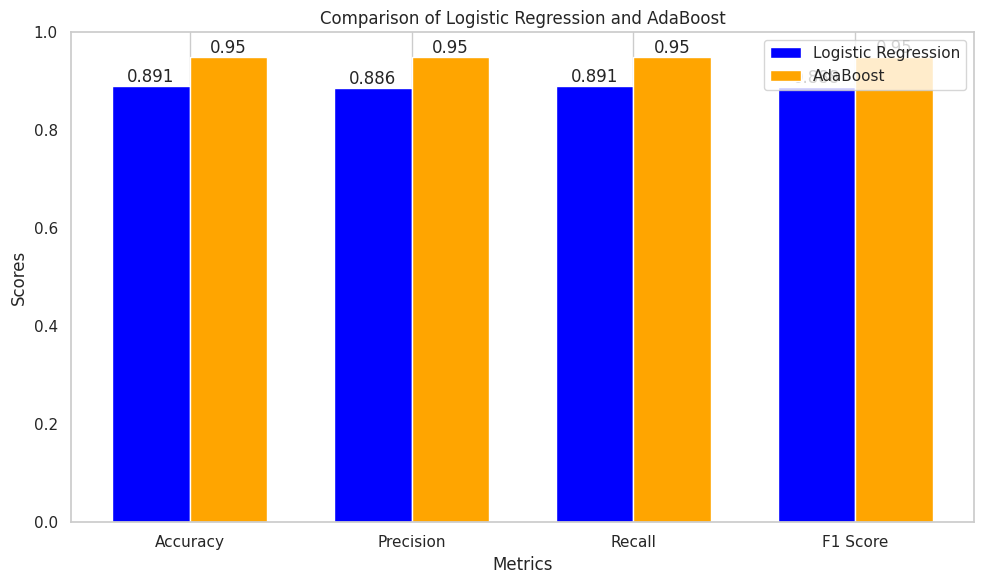

In [60]:
# Convert the data into a format suitable for plotting
metric_labels = metrics['Metric']
logistic_scores = metrics['Logistic Regression']
adaboost_scores = metrics['AdaBoost']

# Create a bar plot
bar_width = 0.35
x = np.arange(len(metric_labels))

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width/2, logistic_scores, bar_width, label='Logistic Regression', color='blue')
bars2 = plt.bar(x + bar_width/2, adaboost_scores, bar_width, label='AdaBoost', color='orange')

# Annotate bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Logistic Regression and AdaBoost')
plt.xticks(x, metric_labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Confusion Matrix for Logistic Regression:
 [[ 1918  1119]
 [  691 12897]]

Confusion Matrix for AdaBoost:
 [[ 2521   516]
 [  307 13281]]


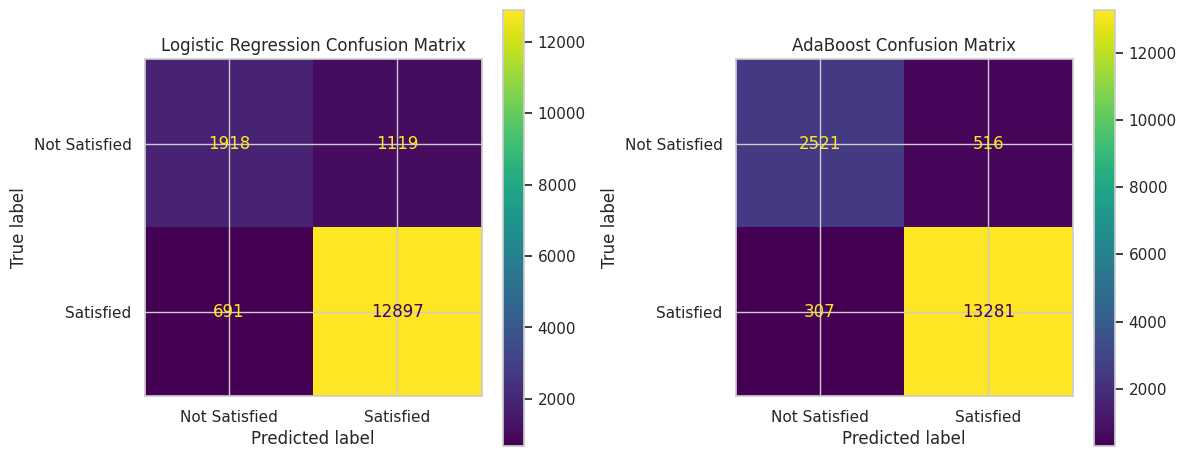

In [65]:
# Make predictions on the validation set
y_pred_logistic = logistic_model.predict(X_val)
y_pred_adaboost = adaboost_model.predict(X_val)

# Calculate confusion matrices
confusion_matrix_logistic = confusion_matrix(y_val, y_pred_logistic)
confusion_matrix_adaboost = confusion_matrix(y_val, y_pred_adaboost)

# Print confusion matrices
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix_logistic)
print("\nConfusion Matrix for AdaBoost:\n", confusion_matrix_adaboost)

# Plotting the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_logistic, display_labels=['Not Satisfied', 'Satisfied']).plot(ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')

# AdaBoost Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_adaboost, display_labels=['Not Satisfied', 'Satisfied']).plot(ax=axes[1])
axes[1].set_title('AdaBoost Confusion Matrix')

plt.tight_layout()
plt.show()